<a href="https://colab.research.google.com/github/Nur9702/15-dars/blob/main/19_UNSUPERVISED_LEARNING_CLUSTERING_19_8_YAKUNIY_AMALIY_VAZIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/h4PPC71.png)
#**19-modul. Unsupervised learning. Clustering**
# 19.8. Modul boʻyicha yakuniy amaliy vazifa. Mijozlarni xarajat turlariga qarab segmentlash

**Ushbu vazifa orqali siz:**

✔️ klasterlash;

✔️ maʼlumotlarni normallashtirish;

✔️ klaster tahlili;

✔️ vizualizatsiya kabi real data sayns loyihalari uchun zarur texnik ko‘nikmalarga ega bo‘lasiz.

## **Dataset: Wholesale Customers Data**  
- **Manba:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)  
- **Hajmi:** **22 KB**
- **Format:** CSV  
- **Tavsif:** bu dataset **ulgurji savdo mijozlarini** xarajatlar bo‘yicha klasterlash uchun ishlatiladi.  
  U quyidagi xarajat kategoriyalarini o‘z ichiga oladi:  
  - **channel** (mijoz turi: 1 – HoReCa (mehmonxona, restoran, kafelar) yoki 2 – chakana savdo)  
  - **region** (hudud: 1 – Lisbon, 2 – Oporto, 3 – boshqa)  
  - **fresh** (yangi mahsulotlarga sarf qilingan summa)  
  - **milk** (sut mahsulotlariga sarf qilingan summa)  
  - **grocery** (oziq-ovqat mahsulotlariga sarf qilingan summa)  
  - **frozen** (muzlatilgan mahsulotlarga sarf qilingan summa)  
  - **Detergents_Paper** (kimyoviy tozalash va qog‘oz mahsulotlari)  
  - **delicassen** (delikates mahsulotlar)  

---

### **Vazifa: mijozlarni xarajat turlariga qarab segmentlash**  
Maqsad – **mijozlarni xarajat qiladigan mahsulotlar bo‘yicha klasterlash va marketologlarga tavsiyalar berish**  

---

### **Klasterlash bosqichlari**  
1) **Maʼlumotlarni tayyorlash**  
   - `Channel` va `Region` ustunlarini olib tashlang yoki kodlang.  
   - Har bir xarajat ustunini **normalizatsiya qiling**.  

2) **K-means klasterlashni amalga oshirish**  
   - K-means yordamida mijozlarni **xarajat qilish odatlari** bo‘yicha segmentlarga ajrating.  

3) **Natijalarni vizualizatsiya qilish**  
   - **Pairplot yoki scatter plot** yordamida klasterlarni ko‘rsating.  
   - Har bir segmentning xarajatlar bo‘yicha o‘rtacha qiymatini diagrammada aks ettiring.

---

###*** ESLATMA**: *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Wholesale_customers_data.csv")
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
#javobni shu yerda yozing.
df = df.drop(['Channel', 'Region'], axis=1)
display(df.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
display(df_scaled.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


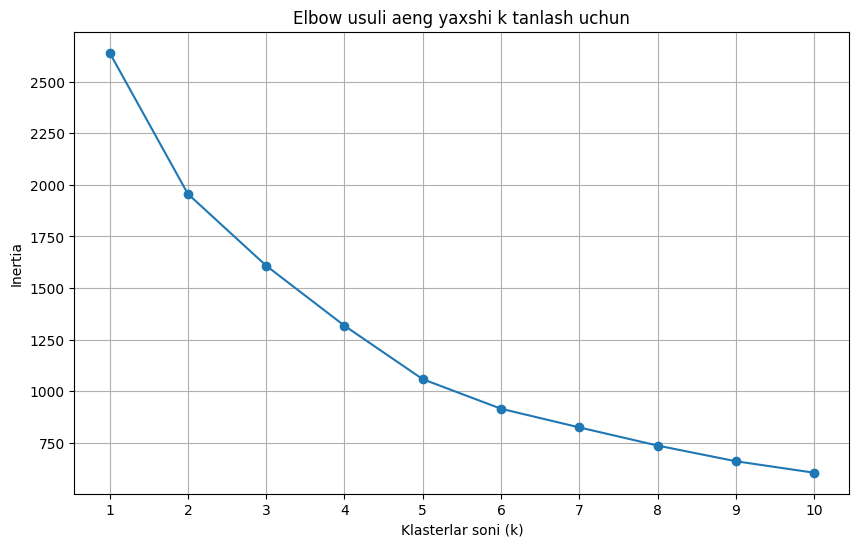

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#asos bu o'zgaruvchi
asos = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    asos.append(kmeans.inertia_)

# elbow usuli
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), asos, marker='o')
plt.xlabel('Klasterlar soni (k)')
plt.ylabel('Inertia')
plt.title('Elbow usuli aeng yaxshi k tanlash uchun')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [23]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=42, n_init=15)
clusters = kmeans.fit_predict(df_scaled)

df['Cluster'] = clusters

display(df.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,DBSCAN_Cluster
0,12669,9656,7561,214,2674,1338,1,0
1,7057,9810,9568,1762,3293,1776,0,0
2,6353,8808,7684,2405,3516,7844,0,-1
3,13265,1196,4221,6404,507,1788,1,0
4,22615,5410,7198,3915,1777,5185,1,-1


In [24]:
#DBSCAN usuli
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(df_scaled)

df['DBSCAN_Cluster'] = clusters_dbscan

display(df['DBSCAN_Cluster'].value_counts())

display(df.head())

,count
DBSCAN_Cluster,
0,261
-1,174
1,5


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,DBSCAN_Cluster
0,12669,9656,7561,214,2674,1338,1,0
1,7057,9810,9568,1762,3293,1776,0,0
2,6353,8808,7684,2405,3516,7844,0,-1
3,13265,1196,4221,6404,507,1788,1,0
4,22615,5410,7198,3915,1777,5185,1,-1


In [21]:
# Sonlarni solishtirish
print("K-means number of clusters:", df['Cluster'].nunique())
print("DBSCAN number of clusters:", df['DBSCAN_Cluster'].nunique())

# Hajmini solishtirish
print("\nK-means cluster sizes:")
display(df['Cluster'].value_counts())

# Clasterlar hajmini solishtirish
print("\nDBSCAN cluster sizes:")
display(df['DBSCAN_Cluster'].value_counts())


print("/Birinchi 10 talik qatordagi solishtirma:")
display(df[['Cluster', 'DBSCAN_Cluster']].head(10))

K-means number of clusters: 4
DBSCAN number of clusters: 3

K-means cluster sizes:


,count
Cluster,
1,315
0,110
2,10
3,5



DBSCAN cluster sizes:


,count
DBSCAN_Cluster,
0,261
-1,174
1,5


/Birinchi 10 talik qatordagi solishtirma:


,Cluster,DBSCAN_Cluster
0,1,0
1,0,0
2,0,-1
3,1,0
4,1,-1
5,1,0
6,1,0
7,1,0
8,1,0
9,0,-1


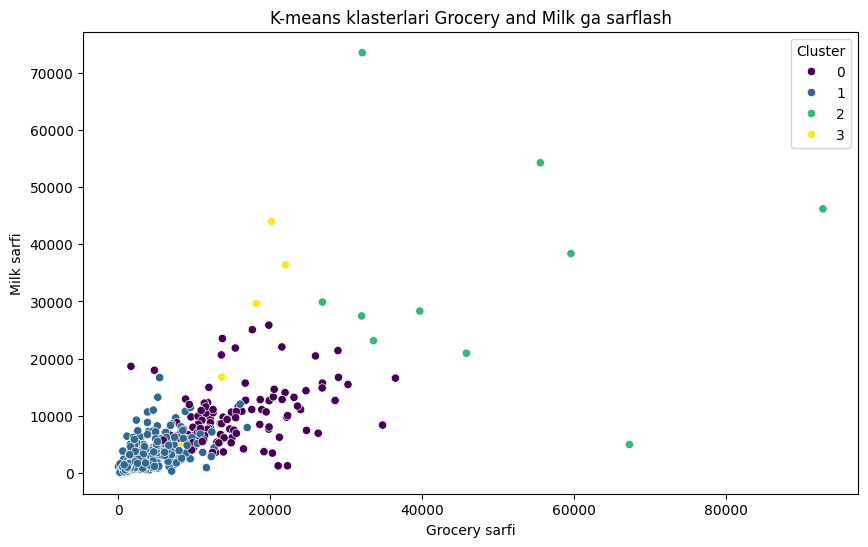

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rangli tarzda visualizatsiya qilish
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Grocery', y='Milk', hue='Cluster', data=df, palette='viridis')
plt.title('K-means klasterlari Grocery and Milk ga sarflash')
plt.xlabel('Grocery sarfi')
plt.ylabel('Milk sarfi')
plt.show()


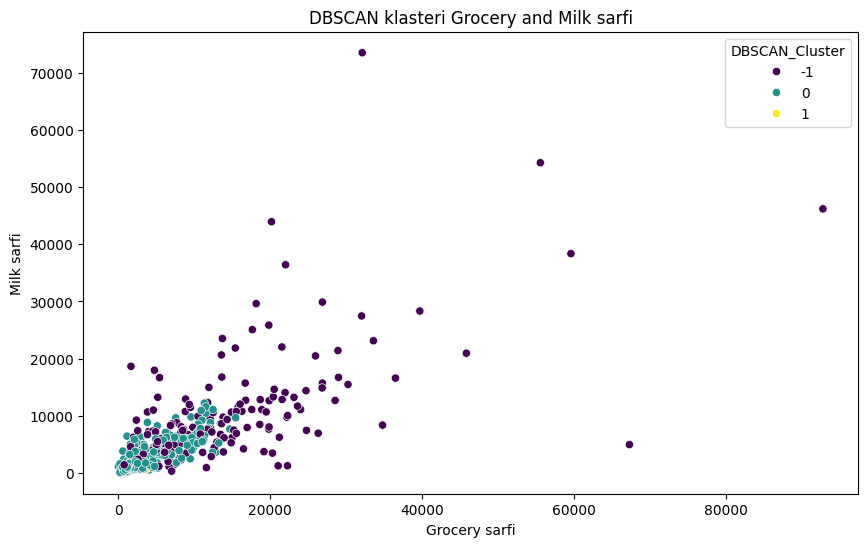

In [29]:
 #DBSCAN klasteriga binoan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Grocery', y='Milk', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN klasteri Grocery and Milk sarfi')
plt.xlabel('Grocery sarfi')
plt.ylabel('Milk sarfi')
plt.show()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,5591.436364,10113.027273,15637.390909,1499.918182,6711.354545,1759.090909
1,13504.987302,3044.539683,3844.444444,3271.425397,852.320635,1127.107937
2,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
3,50270.600000,26361.800000,16416.000000,25122.800000,2475.000000,18595.200000


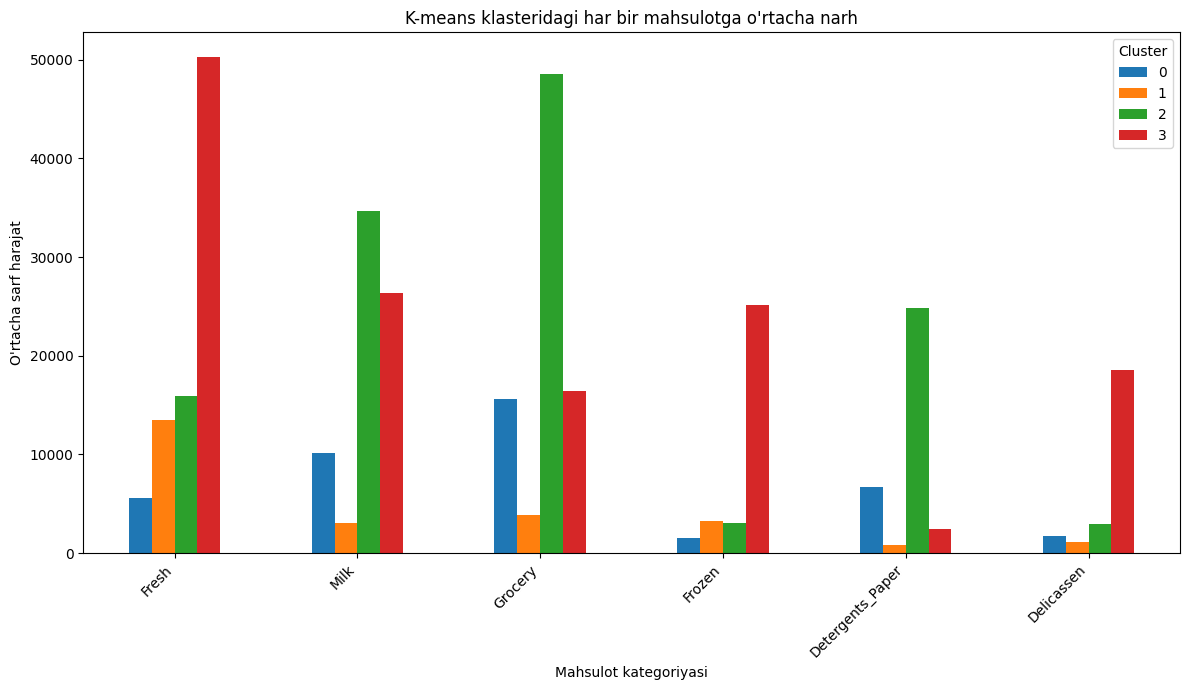

In [32]:
# O'rtacha qiymatni topish
cluster_avg_spending = df.groupby('Cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()

display(cluster_avg_spending)

# Har bir mahsulotga sarflanadiganlarning o'rtacha qiymati
cluster_avg_spending.T.plot(kind='bar', figsize=(12, 7))
plt.title('K-means klasteridagi har bir mahsulotga o\'rtacha narh')
plt.xlabel('Mahsulot kategoriyasi')
plt.ylabel('O\'rtacha sarf harajat')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
